In [1]:
import numpy as np

# Parameters
n, p = 50, 40  # Dimensions of the matrix
noise_std = 0.1  # Standard deviation of the homoscedastic noise

# Generate two random vectors
u = np.random.rand(n)  # Vector of length n
v = np.random.rand(p)  # Vector of length p

# Create a rank-1 matrix as the outer product of u and v
rank_1_matrix = np.outer(u, v)

# Add homoscedastic Gaussian noise (constant variance across the matrix)
noise = np.random.normal(0, noise_std, size=(n, p))
noisy_matrix = rank_1_matrix + noise

# Print the original and noisy matrix
print("Rank-1 Matrix (Outer Product):")
print(rank_1_matrix)
print("\nNoisy Matrix (with Homoscedastic Noise):")
print(noisy_matrix)


Rank-1 Matrix (Outer Product):
[[0.0814309  0.03337666 0.06209643 ... 0.11860028 0.06640964 0.06052439]
 [0.28769827 0.11792093 0.21938891 ... 0.419019   0.23462763 0.21383481]
 [0.37187843 0.15242445 0.28358184 ... 0.54162346 0.30327939 0.27640262]
 ...
 [0.57379623 0.23518593 0.43755748 ... 0.83570725 0.46795016 0.42648019]
 [0.40003513 0.16396523 0.30505318 ... 0.58263237 0.32624213 0.29733039]
 [0.53688215 0.22005569 0.40940806 ... 0.78194363 0.43784549 0.3990434 ]]

Noisy Matrix (with Homoscedastic Noise):
[[-0.01398651  0.26584288  0.13431781 ...  0.13717317  0.0591355
   0.02817375]
 [ 0.44045867  0.08461419  0.30465027 ...  0.3492341   0.2577649
   0.17134273]
 [ 0.52094819  0.25829309  0.12713002 ...  0.43289745  0.21850613
   0.29991599]
 ...
 [ 0.51650339  0.20376191  0.41111345 ...  0.91970648  0.63464224
   0.52955908]
 [ 0.34958655  0.16091656  0.24274725 ...  0.67341849  0.34500172
   0.30228542]
 [ 0.5374926   0.26120417  0.43337458 ...  0.88449401  0.56260458
   0.3915

In [2]:
import sys
import os
import matplotlib.pyplot as plt

# Add the path to utils.py
sys.path.append(r"c:\Document\Serieux\Travail\python_work\cEBNM_torch\py")
from cEBMF import *

In [3]:
mycebmf= cEBMF(data= noisy_matrix)
K=5
# Perform udv_si transformation
U, s, Vt = np.linalg.svd(noisy_matrix, full_matrices=False)

 
mycebmf

In [4]:
K = np.min([K, U.shape[1]])
print(K)

5


In [5]:
mycebmf.init_LF()
print(mycebmf.L[:,1])
print(mycebmf.F[:,1])


NameError: name 'data' is not defined

In [ ]:
 if self.K == 1:
            # When K=1, directly calculate outer product for first and second moments
            prod_square_firstmom = np.outer(self.L[:, 0] ** 2, self.F[:, 0] ** 2)
            prod_sectmom = np.outer(self.L2[:, 0], self.F2[:, 0])
        else:
            # When K>1, sum the outer products across all K components
            prod_square_firstmom = np.sum(
                [np.outer(self.L[:, k] ** 2, self.F[:, k].T ** 2) for k in range(self.K)], axis=0
            )
            prod_sectmom = np.sum(
                [np.outer(self.L2[:, k], self.F2[:, k]) for k in range(self.K)], axis=0
            )

        self.update_fitted_val()  # Update fitted values Y_fit

        # Compute R2 as per the formula
        R2 = (self.data- self.Y_fit) ** 2 - prod_square_firstmom + prod_sectmom

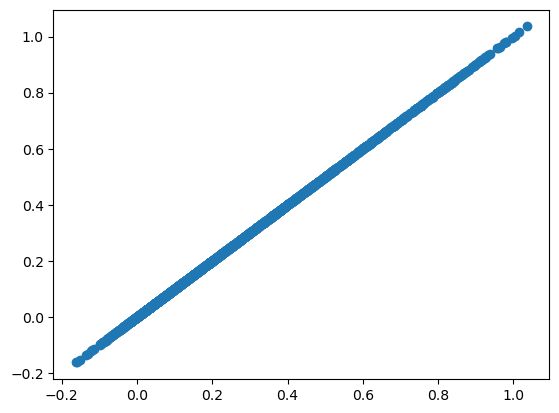

In [6]:
mycebmf.update_fitted_val()
U_k = U[:, :K]
D_k = np.diag(s[:K])
V_k = Vt[:K, :]
L = np.matmul(U_k,  D_k)
F =V_k.T
 
plt.scatter(mycebmf.Y_fit , np.sum( [np.outer(    L[:, k]  ,   F[:, k]    ) for k in range(  K)], axis=0) )

check partial residual is good, seems fine

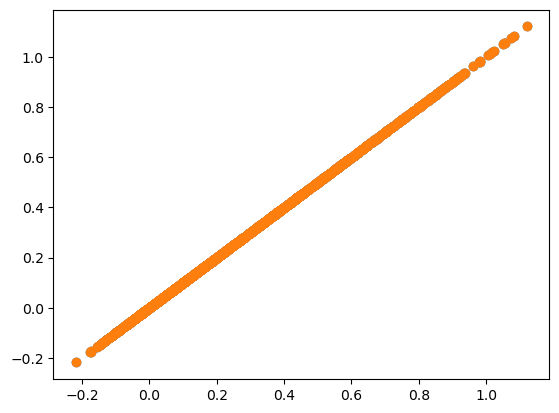

In [7]:
mycebmf.cal_partial_residuals(k=0)
mycebmf.update_fitted_val()
idx_loop = set(range(5))-{0}
Rk= noisy_matrix-np.sum( [np.outer(  mycebmf.L[:, j]  ,  mycebmf.F[:, j]    ) for j in  idx_loop], axis=0)
plt.scatter (mycebmf.Rk, Rk)
plt.scatter( mycebmf.Rk, 
            noisy_matrix- np.sum( [np.outer(    L[:, k]  ,   F[:, k]    ) for k in set(range(  K))-{0}], axis=0)
            )

check if update works

In [8]:
mycebmf.update_tau()
mycebmf.tau

array([[141.23977611, 141.23977611, 141.23977611, ..., 141.23977611,
        141.23977611, 141.23977611],
       [141.23977611, 141.23977611, 141.23977611, ..., 141.23977611,
        141.23977611, 141.23977611],
       [141.23977611, 141.23977611, 141.23977611, ..., 141.23977611,
        141.23977611, 141.23977611],
       ...,
       [141.23977611, 141.23977611, 141.23977611, ..., 141.23977611,
        141.23977611, 141.23977611],
       [141.23977611, 141.23977611, 141.23977611, ..., 141.23977611,
        141.23977611, 141.23977611],
       [141.23977611, 141.23977611, 141.23977611, ..., 141.23977611,
        141.23977611, 141.23977611]])

In [9]:
print(mycebmf.prior_F
      )

mycebmf.update_loading_factor_k(k=0)

norm


In [10]:
k=0

mycebmf.cal_partial_residuals(k=k)
compute_hat_l_and_s_l(Z = mycebmf.Rk,
                                                            nu = mycebmf.F[:,k] ,
                                                            omega= mycebmf.F2[:,k], 
                                                            tau= mycebmf.tau  )
compute_hat_f_and_s_f(Z = mycebmf.Rk,
                                                            nu = mycebmf.L[:,k] ,
                                                            omega= mycebmf.L2[:,k], 
                                                            tau= mycebmf.tau  )
 

(array([-0.22215063, -0.21559384, -0.05231362, -0.17204853, -0.16513582,
        -0.11298962, -0.11450514, -0.04045291, -0.08721281, -0.1362565 ,
        -0.22715338, -0.17882431, -0.04963436, -0.14696194, -0.22968746,
        -0.12719981, -0.03649376, -0.25527312, -0.10268394, -0.26959929,
        -0.17296027, -0.13008206, -0.24783514, -0.1845105 , -0.1453996 ,
        -0.26306823, -0.26725763, -0.09185829, -0.05574351, -0.02272605,
        -0.00192135, -0.13654725, -0.00444499, -0.23580204, -0.05412906,
        -0.19764548, -0.04175857, -0.10876662, -0.13895656, -0.02413871]),
 array([0.00526397, 0.00526397, 0.00526397, 0.00526397, 0.00526397,
        0.00526397, 0.00526397, 0.00526397, 0.00526397, 0.00526397,
        0.00526397, 0.00526397, 0.00526397, 0.00526397, 0.00526397,
        0.00526397, 0.00526397, 0.00526397, 0.00526397, 0.00526397,
        0.00526397, 0.00526397, 0.00526397, 0.00526397, 0.00526397,
        0.00526397, 0.00526397, 0.00526397, 0.00526397, 0.00526397,
      

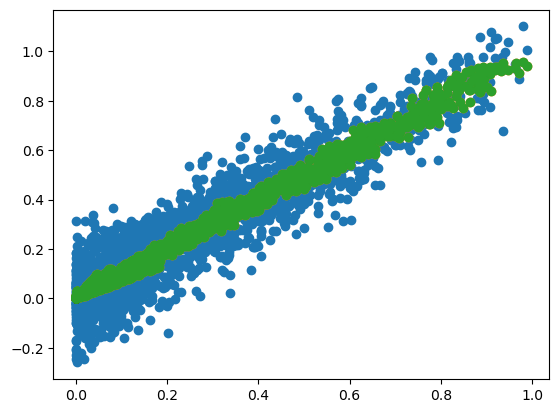

In [20]:
mycebmf.iter()
mycebmf.update_fitted_val()
plt.scatter(mycebmf.Y_fit, noisy_matrix)
 
plt.scatter(mycebmf.Y_fit, rank_1_matrix)
plt.scatter(np.outer(mycebmf.L[:,0],mycebmf.F[:,0] ), rank_1_matrix)


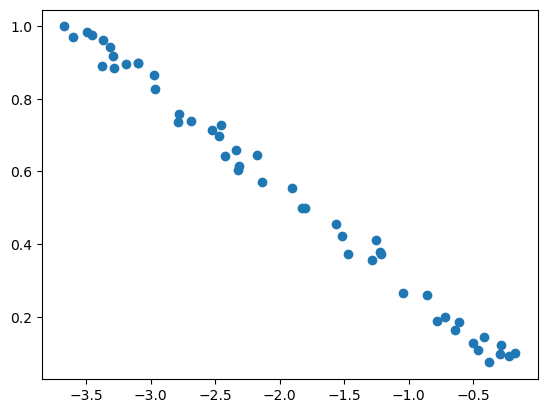

In [21]:
plt.scatter(mycebmf.L[:,0], u)

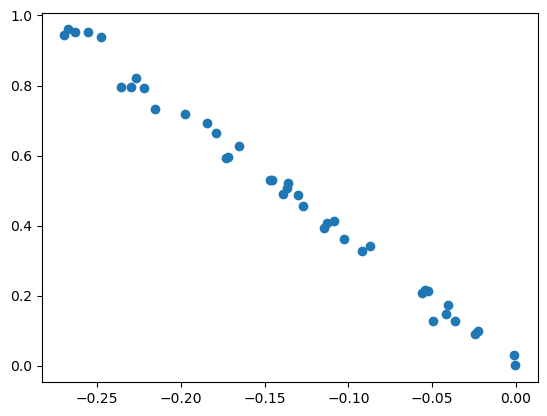

In [22]:
plt.scatter(mycebmf.F[:,0], v)

In [24]:
mycebmf.L[:,1]

array([-1.71461649e-35, -7.53867650e-36, -8.11356612e-36,  1.44126758e-36,
        4.43544979e-35,  1.34672422e-35, -3.05288058e-35,  4.76883266e-36,
        2.09458388e-35, -8.12003634e-36,  8.97100362e-36,  2.79707192e-35,
       -2.41678110e-35,  1.92857162e-35, -1.62397955e-35,  2.61773380e-35,
       -2.04496338e-35,  2.64066228e-35, -4.36450078e-35,  2.88434743e-35,
        4.33262643e-36, -1.74510744e-35, -2.51805460e-35, -4.35762780e-35,
        1.89708152e-35,  9.12872917e-36,  5.48386881e-36,  2.83503274e-36,
       -2.57737936e-35,  3.48688717e-35, -5.20471714e-37, -3.37648541e-36,
       -1.92989270e-35, -3.47772512e-35, -2.59081414e-35,  3.06416579e-35,
        1.42182206e-35, -1.63803964e-35,  7.46372237e-36,  4.38222701e-35,
        9.75644052e-36,  3.34957793e-35,  1.32935476e-35, -1.53868656e-35,
       -1.80281067e-35,  1.35263878e-36, -5.40421207e-36,  5.18041695e-35,
       -1.56219446e-35,  8.01589432e-36])